In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the data
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
data.head(1000)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,15810218,Sun,610,Spain,Male,29,9,0.00,3,0,1,83912.24,0
996,997,15645621,Hunter,811,Spain,Male,44,3,0.00,2,0,1,78439.73,0
997,998,15608114,Manfrin,587,Spain,Male,62,7,121286.27,1,0,1,6776.92,0
998,999,15659557,Artamonova,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0


In [ ]:
#Perform Below Visualizations
#1_Univariate Analysis

In [ ]:
#calculate mean of 'EstimatedSalary'
data['EstimatedSalary'].mean()

100090.239881

In [ ]:
#calculate median of ''
data['EstimatedSalary'].median()

100193.915

In [ ]:
#calculate Standard deviation of "EstimatedSalary"
data['EstimatedSalary'].std()

57510.49281769816

In [ ]:
#create frequecy table for 'EstimatedSalary'
data['EstimatedSalary'].value_counts()


24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

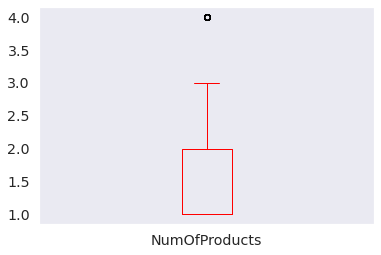

In [ ]:
#create boxplot
import matplotlib.pyplot as plt
data.boxplot(column=['NumOfProducts'],grid=False,color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f95617610>]],
      dtype=object)

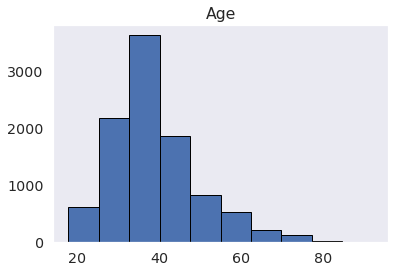

In [ ]:
#create histogram
import matplotlib.pyplot as plt
data.hist(column='Age',grid=False, edgecolor='black')

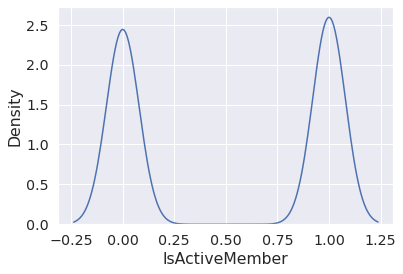

In [ ]:
#create a density curve
import seaborn as sns
sns.kdeplot(data['IsActiveMember'])

Text(0, 0.5, 'Customer Age')

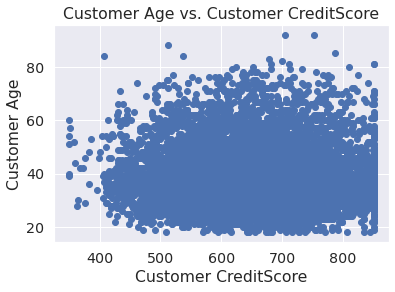

In [ ]:
#2_Bi - Variate Analysis

import matplotlib.pyplot as plt

#create scatterplot of CreditScore vs. Balance
plt.scatter(data.CreditScore, data.Age)
plt.title('Customer Age vs. Customer CreditScore')
plt.xlabel('Customer CreditScore')
plt.ylabel('Customer Age')

In [ ]:
#create correlation matrix
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
import statsmodels.api as sm

#define response variable
y = data['CreditScore']

#define explanatory variable
x = data [['Balance']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y,x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3929
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.531
Time:                        12:58:01   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        649.7861      1.529    424.948      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#3_Multi - variate Analysis


In [ ]:
#retrieving data 
data.head(200)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
196,197,15635905,Moran,616,Spain,Female,32,6,0.00,2,1,1,43001.46,0
197,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,1,1,47847.19,0


In [ ]:
data = data[["Tenure","HasCrCard","Exited"]]

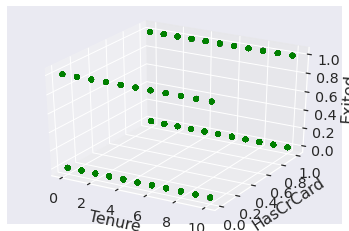

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
n = 100
ax.scatter(data["Tenure"],data["HasCrCard"],data["Exited"],color = "green")
ax.set_xlabel("Tenure")
ax.set_ylabel("HasCrCard")
ax.set_zlabel("Exited")
plt.show()

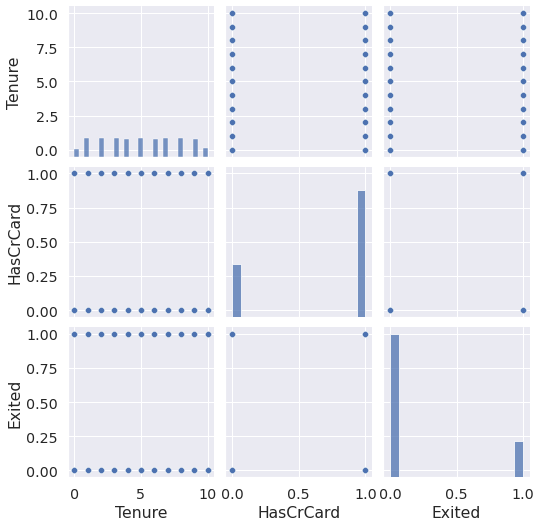

In [ ]:
#pair plot
sns.pairplot(data)


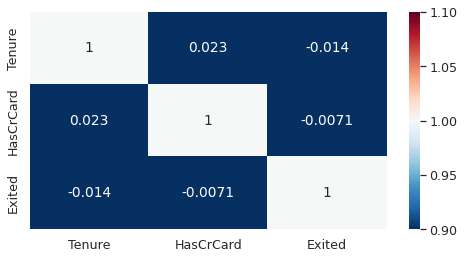

In [ ]:
#Heat map

sns.set(font_scale =1.15 )
plt.figure(figsize =(8,4))
sns.heatmap(
    data.corr(),
    cmap = 'RdBu_r',
    annot = True,
    vmin = 1, vmax = 1
)

Text(0, 0.5, 'Exited')

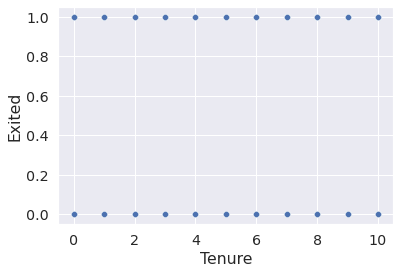

In [ ]:
sns.set(font_scale = 1.3)

sns.scatterplot(
    x = 'Tenure',
    y = 'Exited',
    data = data)

plt.xlabel(
    'Tenure'
)
plt.ylabel('Exited')


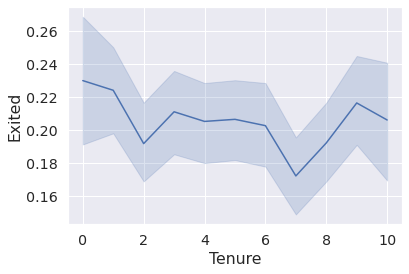

In [ ]:
#line plot
sns.lineplot(
    x="Tenure", 
    y="Exited",
    data=data
    )

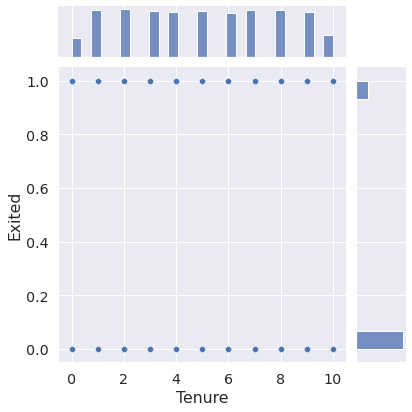

In [ ]:
#Joint plot

sns.jointplot(
    x='Tenure', 
    y='Exited', 
    data=data)

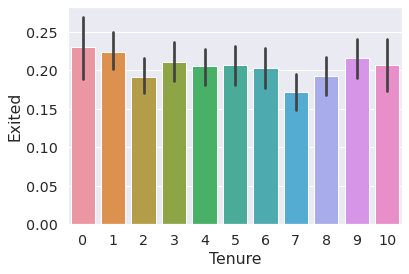

In [ ]:
#Bar plot

sns.barplot(
    x='Tenure', 
    y='Exited', 
    data=data, 
    )

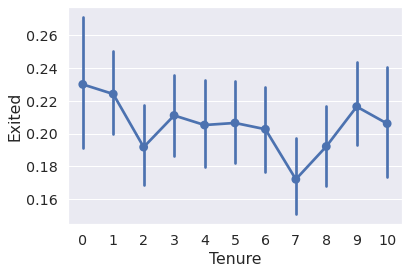

In [ ]:
#Point plot

sns.pointplot(
    x='Tenure', 
    y='Exited', 
    data=data);

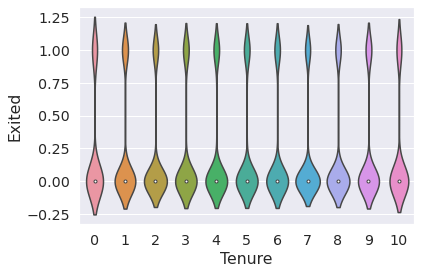

In [ ]:
# Violin plot

sns.violinplot(
    x='Tenure', 
    y='Exited', 
    data=data);

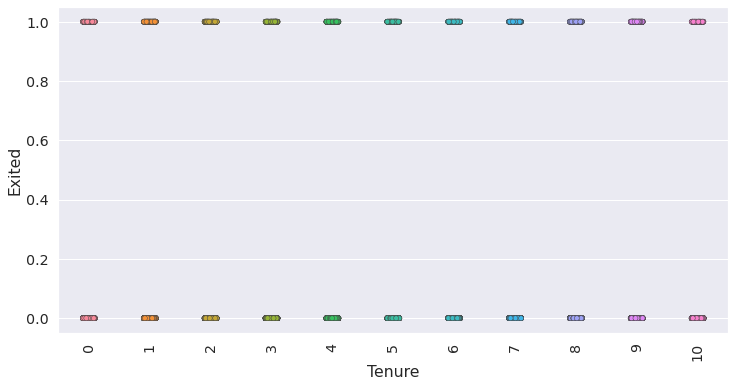

In [ ]:
#Strip plot

plt.figure(
    figsize=(12, 6))
sns.stripplot(
    x='Tenure', 
    y='Exited', 
    data=data, 
    linewidth=.5)
plt.xticks(rotation=90);

In [ ]:
#5. Handle the Missing values

In [ ]:
#Data Removal
#Dropping the 2nd and 3rd index

dropped_data = data.drop([2,3],axis = 0)

#Viewing the dataframe

dropped_data

,Tenure,HasCrCard,Exited
0,2,1,1
1,1,0,0
4,2,1,0
5,8,1,1
6,7,1,0
...,...,...,...
9995,5,1,0
9996,10,1,0
9997,7,0,1
9998,3,1,1


In [ ]:
# Filling each column with their mean values

data['Tenure']=data['Tenure'].fillna(data['Tenure'].mean())
data['Exited']=data['Exited'].fillna(data['Exited'].mean())
# Viewing the dataframe
data

,Tenure,HasCrCard,Exited
0,2,1,1
1,1,0,0
2,8,1,1
3,1,0,0
4,2,1,0
...,...,...,...
9995,5,1,0
9996,10,1,0
9997,7,0,1
9998,3,1,1


In [ ]:
# Find the outliers and replace the outliers
#Using pandas describe() to find outliers

data.describe()[['Tenure','HasCrCard']]

,Tenure,HasCrCard
count,10000.000000,10000.00000
mean,5.012800,0.70550
std,2.892174,0.45584
min,0.000000,0.00000
25%,3.000000,0.00000
50%,5.000000,1.00000
75%,7.000000,1.00000
max,10.000000,1.00000


In [ ]:
#Find outliers using a histogram

#Create a histogram
fig = px.histogram(data,x='Tenure')
fig.show()

In [ ]:
#Find outliers in data using a box plot

#create a box plot
fig = px.box(data,y="HasCrCard")
fig.show()

In [ ]:
#Find multivariate outliers using a scatter plot

fig = px.scatter(x=data['Tenure'],y=data['HasCrCard'])
fig.show()

In [ ]:
#Finding outliers using statistical methods

#create a function to find outlies using IQR

def find_outliers_IQR(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  IQR = q3-q1
  outliers = data[((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR)))]
  return outliers

In [ ]:
outliers = find_outliers_IQR(data["Tenure"])
print("number of outliers:"+str(len(outliers)))
print("max outlier value:"+str(outliers.max()))
print("min outlier value"+str(outliers.min()))
outliers

number of outliers:0
max outlier value:nan
min outlier valuenan


Series([], Name: Tenure, dtype: int64)

In [ ]:
#8.Split the data into dependent and independent variables.
x = data.iloc[:, :-1].values
print(x)


NameError: ignored

In [ ]:
#9.Scale the independent variable
data.head()
scaler = StandardScaler()


In [ ]:
scaler.fit(data)

StandardScaler()